In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv("data/hist1.csv")
df2 = pd.read_csv("data/playoff.csv")

In [37]:
df1.head()

,Rk,Player,WS,ORtg,DRtg,BPM,PER,TRB%,AST%,STL%,...,PF,PTS,FG%,2P%,3P%,FT%,TS%,eFG%,Pos,-9999
0,1,Quincy Acy,1.1,120,105,0.1,15.9,13.4,5.2,2.0,...,1.8,4.0,0.560,0.562,0.5,0.816,0.632,0.567,F-C,acyqu01
1,2,Jordan Adams,0.4,96,100,1.4,12.8,6.4,10.1,3.4,...,0.8,3.1,0.407,0.410,0.4,0.609,0.489,0.465,G,adamsjo01
2,3,Jordan Adams,0.0,84,90,6.9,17.3,7.6,31.9,10.3,...,1.0,3.5,0.333,0.400,0.0,0.600,0.427,0.333,G,adamsjo01
3,4,Steven Adams,6.5,123,105,0.2,15.5,14.4,4.3,1.0,...,2.8,8.0,0.613,0.613,NaN,0.582,0.621,0.613,C,adamsst01
4,5,Steven Adams,9.7,125,107,1.1,20.6,15.3,5.5,1.8,...,2.8,13.9,0.629,0.631,0.0,0.559,0.630,0.629,C,adamsst01


In [38]:
# removing trash column, team column, and rank column from the dataset
df1.drop(['-9999', 'Team', 'Rk', 'BPM'], axis=1, inplace=True)

# some player names have special characters, this strips those characters and returns the 'normal' letter
df1['Player'] = df1['Player'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# filtering to only use players who have played atleast 1/3 of the given season and played atleast 12 minutes a game
# dataset is already filtered to only have players who played in 4 playoff games that season
df1 = df1[df1['G'] >= 27]
df1 = df1[df1['MP'] >= 12]

In [39]:
df1.head()

,Player,WS,ORtg,DRtg,PER,TRB%,AST%,STL%,TOV%,USG%,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,TS%,eFG%,Pos
3,Steven Adams,6.5,123,105,15.5,14.4,4.3,1.0,14.1,12.6,...,1.1,2.8,8.0,0.613,0.613,NaN,0.582,0.621,0.613,C
4,Steven Adams,9.7,125,107,20.6,15.3,5.5,1.8,13.3,16.7,...,1.7,2.8,13.9,0.629,0.631,0.000,0.559,0.630,0.629,C
5,Steven Adams,9.1,120,106,18.5,14.7,6.6,2.0,12.6,16.4,...,1.7,2.6,13.9,0.595,0.596,0.000,0.500,0.591,0.595,C
6,Steven Adams,6.5,122,106,20.5,19.2,13.2,1.5,14.2,17.3,...,1.5,1.9,10.9,0.592,0.594,0.333,0.582,0.604,0.593,C
7,Steven Adams,6.8,125,108,17.6,19.9,16.1,1.6,19.6,12.0,...,1.5,2.0,6.9,0.547,0.548,0.000,0.543,0.560,0.547,C


In [40]:
df1.shape

(1550, 39)

In [41]:
# prepare to properly merge dataset

# remove special character player names
df2['Player'] = df2['Player'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# remove unecessary columns
df2.drop(['Rk','G','Age','Team','MP','FG','FGA','2P','2PA','3P','3PA','FT','FTA','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','FG%','2P%','3P%','FT%','TS%','eFG%','Pos','-9999', 'PLAY_GS', 'PLAY_G'], axis=1, inplace=True)
df2.head()

,Player,Season,PLAY_PTS
0,Alex Abrines,2016-17,4.8
1,Alex Abrines,2017-18,4.0
2,Precious Achiuwa,2021-22,10.2
3,Jordan Adams,2014-15,1.8
4,Steven Adams,2013-14,3.9


In [42]:
df2.shape

(1958, 3)

In [43]:
# merge datasets on player and season
df = df1.merge(df2, on=['Player', 'Season'])
df.head()

,Player,WS,ORtg,DRtg,PER,TRB%,AST%,STL%,TOV%,USG%,...,PF,PTS,FG%,2P%,3P%,FT%,TS%,eFG%,Pos,PLAY_PTS
0,Steven Adams,6.5,123,105,15.5,14.4,4.3,1.0,14.1,12.6,...,2.8,8.0,0.613,0.613,NaN,0.582,0.621,0.613,C,10.1
1,Steven Adams,9.7,125,107,20.6,15.3,5.5,1.8,13.3,16.7,...,2.8,13.9,0.629,0.631,0.000,0.559,0.630,0.629,C,10.5
2,Steven Adams,9.1,120,106,18.5,14.7,6.6,2.0,12.6,16.4,...,2.6,13.9,0.595,0.596,0.000,0.500,0.591,0.595,C,11.8
3,Steven Adams,6.5,122,106,20.5,19.2,13.2,1.5,14.2,17.3,...,1.9,10.9,0.592,0.594,0.333,0.582,0.604,0.593,C,10.1
4,Steven Adams,6.8,125,108,17.6,19.9,16.1,1.6,19.6,12.0,...,2.0,6.9,0.547,0.548,0.000,0.543,0.560,0.547,C,3.4


In [44]:
df.shape

(929, 40)

In [45]:
df['Player'].nunique()

352

In [46]:
with pd.option_context('display.max_rows', None):
    print(df["Player"].value_counts(dropna=False))

James Harden               11
Chris Paul                 11
Danny Green                10
Jimmy Butler                9
Paul George                 9
LeBron James                9
Kevin Durant                9
Kawhi Leonard               9
Patrick Beverley            8
Russell Westbrook           8
Marc Gasol                  8
Kyle Lowry                  8
Damian Lillard              8
Paul Millsap                8
Stephen Curry               8
Al Horford                  8
Mike Conley                 8
Andre Iguodala              8
CJ McCollum                 7
Jae Crowder                 7
J.J. Redick                 7
Draymond Green              7
Giannis Antetokounmpo       7
Kyle Korver                 7
David West                  6
George Hill                 6
Serge Ibaka                 6
LaMarcus Aldridge           6
Kyrie Irving                6
DeMar DeRozan               6
Jeff Teague                 6
Manu Ginobili               6
Rudy Gobert                 6
Thabo Sefo

In [47]:
# shows only the columns who have atleast one missing value and gives the counts
# the only column that has null values is the 3P% column. This makes sense because
# some players do not take any threes
null_counts = df.isnull().sum()
null_counts[null_counts > 0]
# df[df.isnull().any(axis=1)]

3P%    39
dtype: int64

In [48]:
# fill the null values with 0's because a null value for 3 point 
# percentage means that they did not take any threes meaning their 
# percentage is effectively 0. this is using the assumption that
# missing all of your 3 point shots is essentially the same as
# not taking any.
df['3P%'].fillna(0.00, inplace=True)

# confirm that there are no longer null values
# df.isnull().sum()


In [49]:
grouped = df.groupby('Player')

In [50]:
df = pd.DataFrame(columns=df.columns)
for name, group in grouped:
    averaged_values = group.mean()
    averaged_values['Player'] = name
    df = df.append(averaged_values, ignore_index=True)

/var/folders/4b/z0w6x5_n59g_x_9s3qnbx_p80000gn/T/ipykernel_69496/1824413118.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  averaged_values = group.mean()
/var/folders/4b/z0w6x5_n59g_x_9s3qnbx_p80000gn/T/ipykernel_69496/1824413118.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(averaged_values, ignore_index=True)
/var/folders/4b/z0w6x5_n59g_x_9s3qnbx_p80000gn/T/ipykernel_69496/1824413118.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  averaged_values = group.mean()
/var/folders/4b/z0w6x5_n59g_x_9s3qnbx_p80000gn/T/ipykernel_69496/182441311

In [51]:
with pd.option_context('display.max_rows', None):
    print(df["Player"].value_counts(dropna=False))

Aaron Gordon               1
Al Horford                 1
Maxi Kleber                1
Max Strus                  1
Maurice Harkless           1
Matt Bonner                1
Matt Barnes                1
Matisse Thybulle           1
Mason Plumlee              1
Marvin Williams            1
Marreese Speights          1
Mario Chalmers             1
Marcus Smart               1
Marcus Morris              1
Marco Belinelli            1
Marcin Gortat              1
Marc Gasol                 1
Manu Ginobili              1
Malik Beasley              1
Malcolm Brogdon            1
Luol Deng                  1
Meyers Leonard             1
Michael Carter-Williams    1
Michael Porter Jr.         1
Nate Robinson              1
Nicolas Batum              1
Nick Collison              1
Nick Calathes              1
Nic Claxton                1
Nerlens Noel               1
Nene                       1
Nemanja Bjelica            1
Naz Reid                   1
Myles Turner               1
Mikal Bridges 

In [52]:
df['Player'].nunique()

352

In [53]:
# # create a function that splits the seasons so that it only displays the start of the season
# def get_start_year(season):
#     return int(season.split('-')[0])

# df['Season'] = df['Season'].apply(get_start_year)

# # display the resulting dataframe
# df["Season"]

In [54]:
# checks all the unique positions
df['Pos'].unique()

# G was changed to 0, G-F and F-G was changed to 1, F was changed to 2, F-C and C-F was changed to 3, C was changed to 4
df['Pos'] = df['Pos'].replace({'G': 0, 'G-F': 1, 'F-G': 1, 'F': 2, 'F-C': 3, 'C-F': 3, 'C': 4})
df['Pos'].astype(str)

# create dummy variables for each position category
pos_dummies = pd.get_dummies(df['Pos'], prefix='Pos')

# concatenate the dummy variables with the original DataFrame
df = pd.concat([df, pos_dummies], axis=1)


In [55]:
# df['Season'].unique()

# season_dummies = pd.get_dummies(df['Season'], prefix='Season')
# df = pd.concat([df, season_dummies], axis=1)

[-0.88461538 -0.83333333 -0.82352941 -0.80555556 -0.8        -0.78846154
 -0.7804878  -0.77083333 -0.76811594 -0.75728155 -0.75409836 -0.71428571
 -0.70149254 -0.66666667 -0.60169492 -0.6        -0.6        -0.5875
 -0.57647059 -0.575      -0.55511811 -0.54863813 -0.54726368 -0.53846154
 -0.52830189 -0.52631579 -0.52542373 -0.51724138 -0.51086957 -0.50289017
 -0.5        -0.49710983 -0.49122807 -0.48913043 -0.48275862 -0.47933884
 -0.47826087 -0.465      -0.45762712 -0.44827586 -0.43181818 -0.42201835
 -0.42168675 -0.41860465 -0.41666667 -0.4109589  -0.40703518 -0.39814815
 -0.39759036 -0.39716312 -0.3968254  -0.39130435 -0.38504155 -0.38408304
 -0.37634409 -0.37538462 -0.36936937 -0.36666667 -0.36585366 -0.35978836
 -0.34883721 -0.34825871 -0.34328358 -0.31818182 -0.31065089 -0.309375
 -0.30909091 -0.296875   -0.29577465 -0.29558011 -0.29387755 -0.29370629
 -0.29365079 -0.2885906  -0.28735632 -0.28318584 -0.28289474 -0.28282828
 -0.2826087  -0.28057554 -0.28       -0.27777778 -0.27441

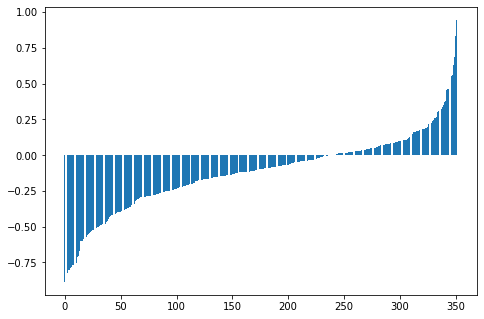

In [56]:
import matplotlib.pyplot as plt
# define a function to classify playoff performance based on regular season points
def classify_playoff_performance(row):
    reg_season_pts = row['PTS']
    playoff_pts = row['PLAY_PTS']
    return (playoff_pts - reg_season_pts) / reg_season_pts

# apply the classification function to each row of the DataFrame
pct_difference = df.apply(classify_playoff_performance, axis=1)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
barnames = [x for x in range(len(pct_difference))]
values = np.sort(np.array(pct_difference))
print(values)
ax.bar(barnames,values)
plt.show()

In [57]:
# import numpy as np
# import matplotlib.pyplot as plt

# # define a function to classify playoff performance based on regular season points
# def classify_playoff_performance(row):
#     reg_season_pts = row['PTS']
#     playoff_pts = row['PLAY_PTS']
#     return (playoff_pts - reg_season_pts) / reg_season_pts

# # apply the classification function to each row of the DataFrame
# pct_difference = df.apply(classify_playoff_performance, axis=1)

# # calculate mean and standard deviation of the relative differences
# mean = np.mean(pct_difference)
# std = np.std(pct_difference)

# # classify players based on relative difference
# categories = []
# for pct_diff in pct_difference:
#     if pct_diff < mean - std:
#         categories.append(0) # underperforming
#     elif pct_diff > mean + std:
#         categories.append(2) # overperforming
#     else:
#         categories.append(1) # performing similarly

# # plot the results
# fig, ax = plt.subplots()
# ax.bar(categories, pct_difference)
# ax.set_xlabel('Performance Category')
# ax.set_ylabel('Relative Difference (Playoff Points per Game - Regular Season Points per Game)')

# plt.show()

In [58]:
# define a function to classify playoff performance based on regular season points
def classify_playoff_performance(row):
    reg_season_pts = row['PTS']
    playoff_pts = row['PLAY_PTS']
    pct_difference = (playoff_pts - reg_season_pts) / reg_season_pts
    if pct_difference > 0.1:
        return 2
    elif pct_difference < -0.1:
        return 0
    else:
        return 1

# apply the classification function to each row of the DataFrame
df['Performance1'] = df.apply(classify_playoff_performance, axis=1)

df['Performance1'].value_counts()

0    174
1    126
2     52
Name: Performance1, dtype: int64

In [59]:
# define a function to classify playoff performance based on regular season points
def classify_playoff_performance2(row):
    reg_season_pts = row['PTS']
    playoff_pts = row['PLAY_PTS']
    difference = (playoff_pts - reg_season_pts)
    if difference >= 0:
        return 1
    else:
        return 0

# apply the classification function to each row of the DataFrame
df['Performance2'] = df.apply(classify_playoff_performance2, axis=1)

df['Performance2'].value_counts()

0    237
1    115
Name: Performance2, dtype: int64

In [60]:
df.dtypes

Player           object
WS               object
ORtg             object
DRtg             object
PER              object
TRB%             object
AST%             object
STL%             object
TOV%             object
USG%             object
Season           object
Age              object
G                object
GS               object
MP               object
FG               object
FGA              object
2P               object
2PA              object
3P               object
3PA              object
FT               object
FTA              object
ORB              object
DRB              object
TRB              object
AST              object
STL              object
BLK              object
TOV              object
PF               object
PTS              object
FG%              object
2P%              object
3P%              object
FT%              object
TS%              object
eFG%             object
Pos             float64
PLAY_PTS         object
Performance1      int64
Performance2    

In [61]:
df.drop(['Player', 'Pos', 'Season'], axis=1, inplace=True)

In [62]:
from sklearn.preprocessing import StandardScaler

# create a list of all column names
all_cols = df.columns.tolist()

# create a list of columns to exclude from scaling
exclude_cols = ['Pos_0', 'Pos_1', 'Pos_2', 'Pos_3', 'Pos_4', 'Performance2', 'Performance1']

# create a list of columns to scale by excluding the exclude_cols list
cols_to_scale = [col for col in all_cols if col not in exclude_cols]
print(cols_to_scale)

# initialize the StandardScaler
scaler = StandardScaler()

# fit the scaler to the data
scaler.fit(df[cols_to_scale])

# transform the selected columns
df[cols_to_scale] = scaler.transform(df[cols_to_scale])

['WS', 'ORtg', 'DRtg', 'PER', 'TRB%', 'AST%', 'STL%', 'TOV%', 'USG%', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'FT%', 'TS%', 'eFG%', 'PLAY_PTS']


In [63]:
df.shape

(352, 39)

In [64]:
df.to_csv('new_cleaned.csv')

----------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# # Assuming df1 and df2 are your two dataframes with a 'Player' column each
# list1 = list(df1['Player'])
# list2 = list(df2['Player'])

# set1 = set(list1)
# set2 = set(list2)

# common_players = set1.intersection(set2)
# num_common_players = len(common_players)

# print(f"There are {num_common_players} common players between the two lists.")


# print(len(df1['Player'].unique()))
# print(len(df2['Player'].unique()))
# print(len(df['Player'].unique()))

# print(len(df1['Player']))
# print(len(df2['Player']))
# print(len(df['Player']))


# # changes all the names to lowercase and removes the space between the first and last name
# df['Player'] = df['Player'].str.lower()
# df['Player'] = df['Player'].str.replace(' ', '')
# # df['Player'].unique()

# # would be better modeled as longitudional data
# #drop player names

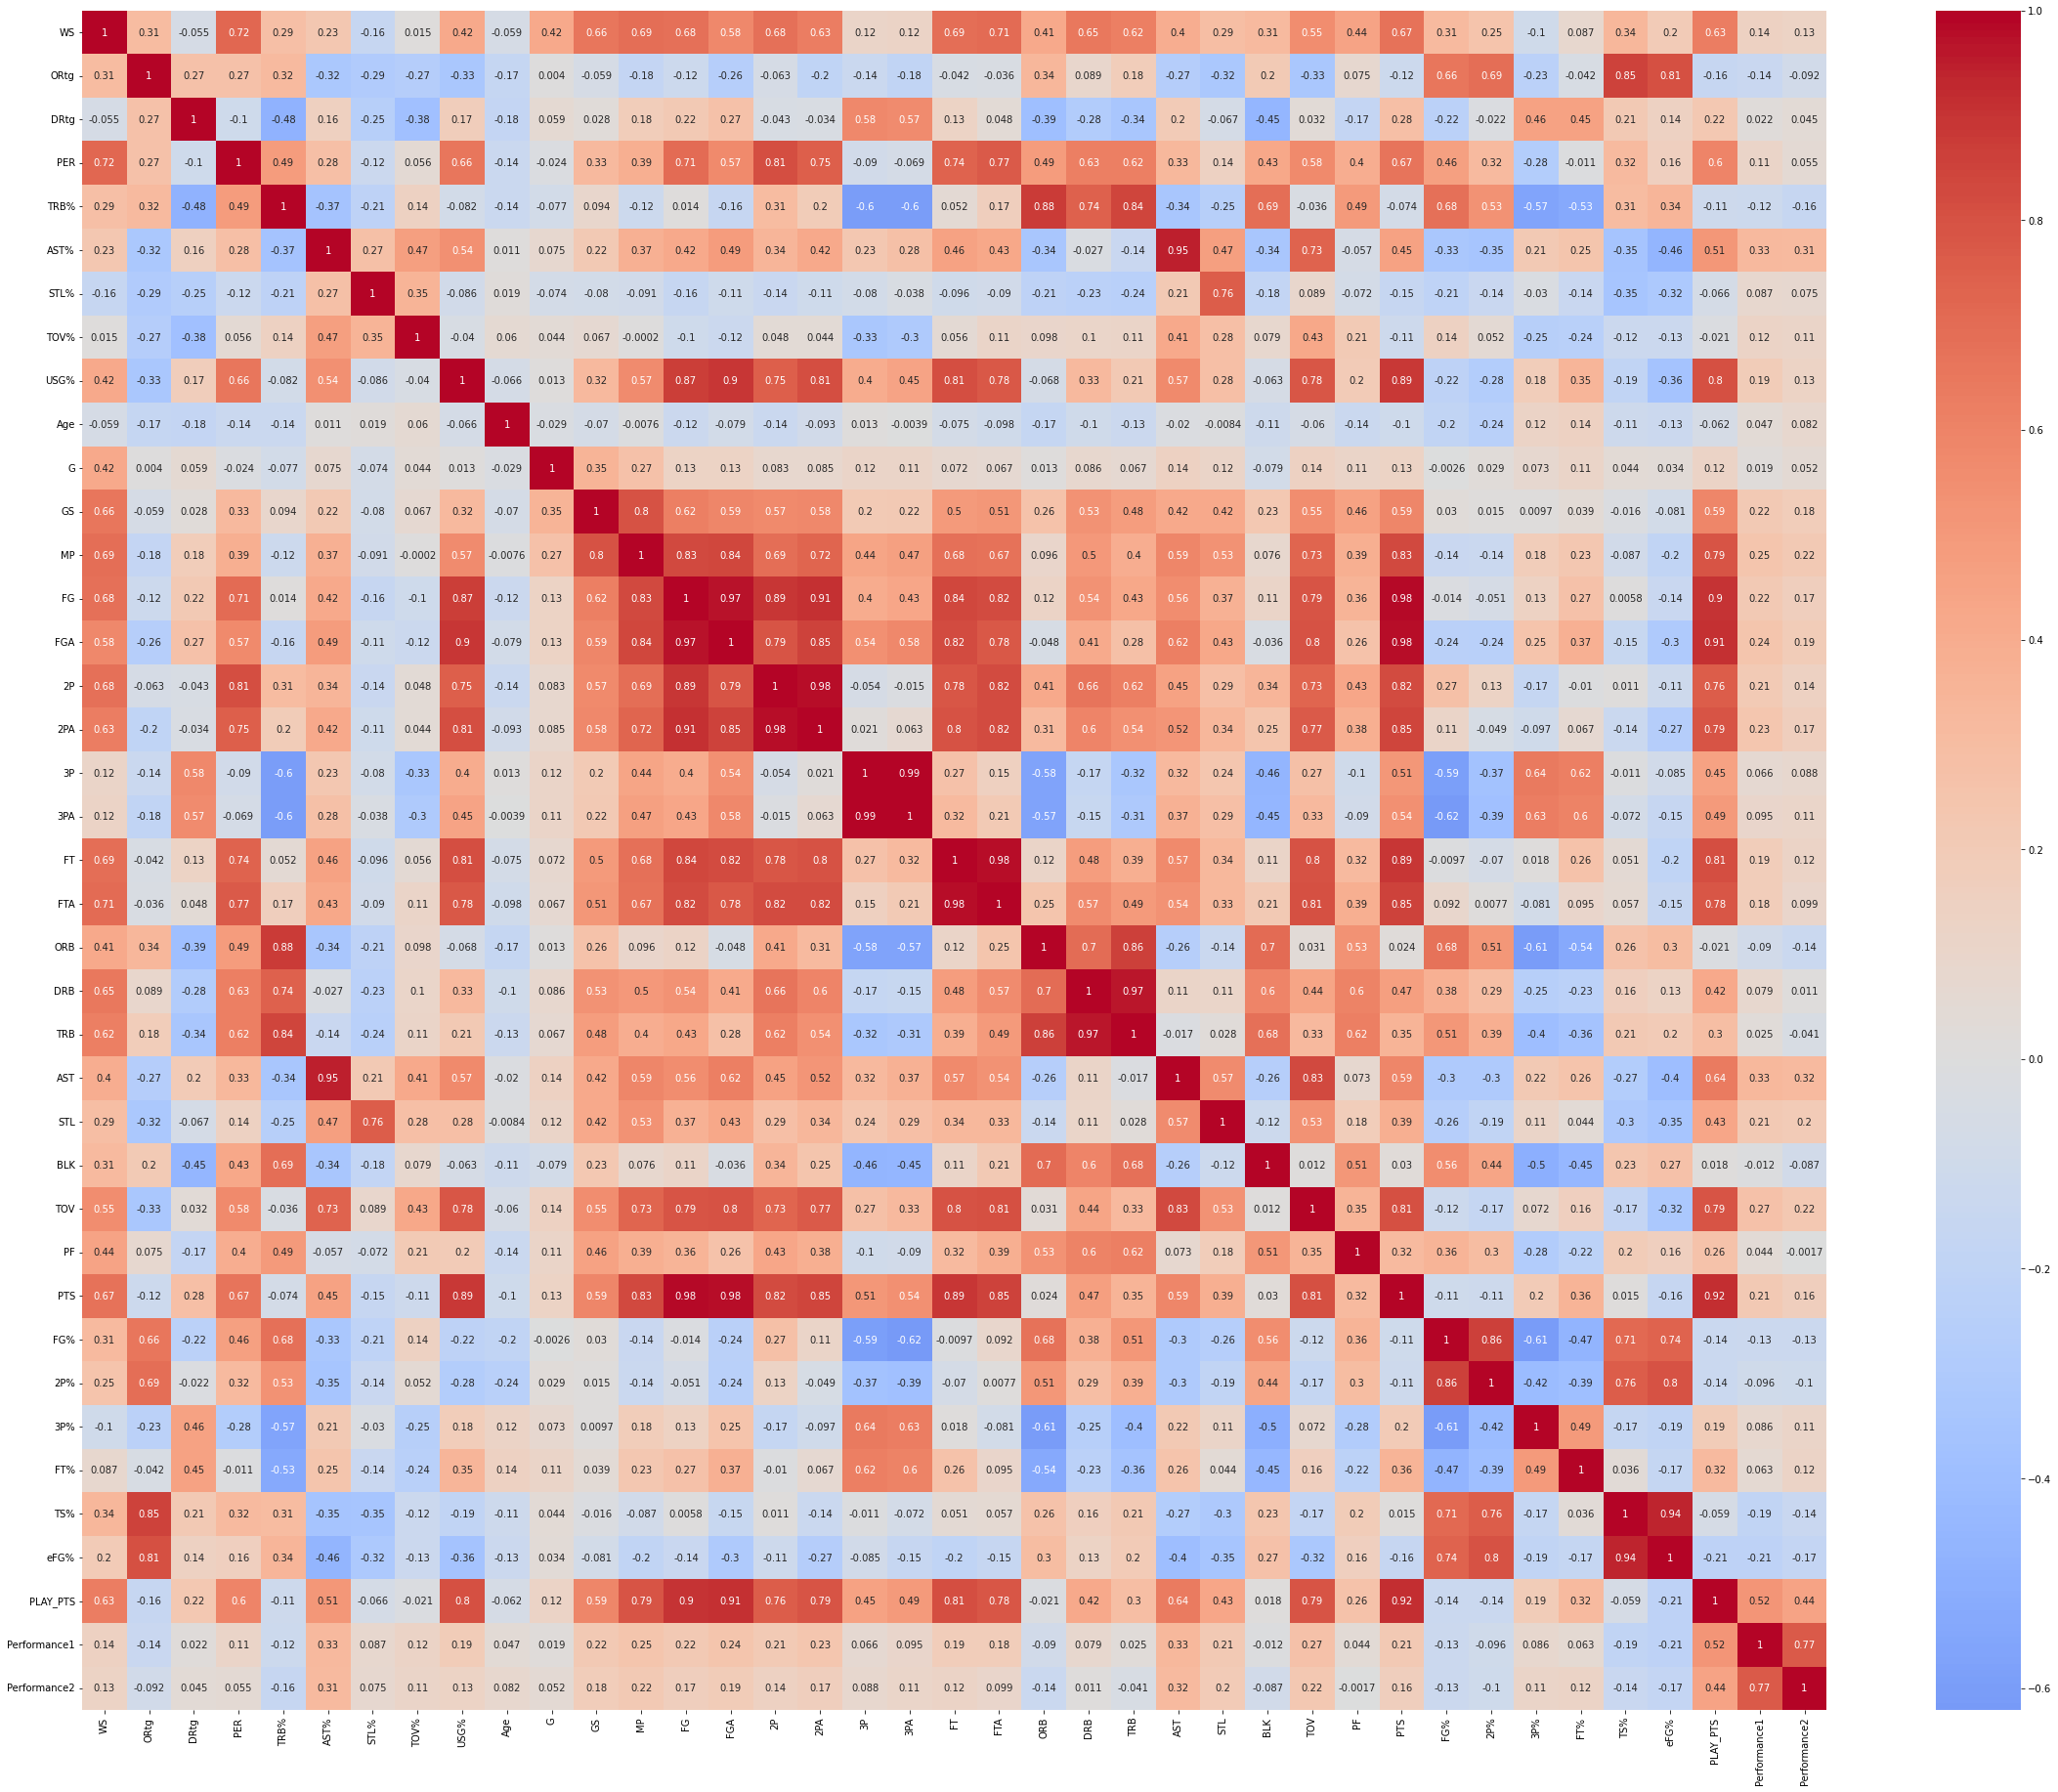

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(40, 32))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True)

# Show the plot
plt.show()